In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers , models
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

2025-03-01 11:56:28.951317: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-01 11:56:28.953927: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-01 11:56:28.995401: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-01 11:56:29.062442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740809489.117011    4647 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740809489.13

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

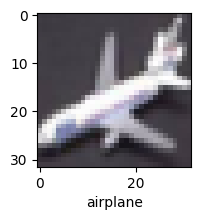

In [8]:
plot_sample(X_train,y_train,2342)

In [9]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10 dataset
])


ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train_scaled,y_train)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-03-01 11:24:30.715095: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.3066 - loss: 1.9335
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4244 - loss: 1.6385
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.4569 - loss: 1.5467
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4758 - loss: 1.4902
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.4943 - loss: 1.4418


In [23]:
ann.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4619 - loss: 1.5249


[1.5317665338516235, 0.4546999931335449]

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = ann.predict(X_test_scaled)
y_pred_classses = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classses))

NameError: name 'ann' is not defined

### Using CNN to imporove the classification

In [11]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, activation='relu',kernel_size=(3,3),input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, activation='relu',kernel_size=(3,3),input_shape= (32,32,3)),
    layers.MaxPooling2D((2,2)),


    #dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10 dataset
])



/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-01 11:56:48.913748: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3695 - loss: 1.7399
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5841 - loss: 1.1868
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6348 - loss: 1.0459
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6640 - loss: 0.9589
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6845 - loss: 0.9074
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7020 - loss: 0.8542
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7214 - loss: 0.8016
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7328 - loss: 0.7665
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7445 - loss: 0.7313
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7587 - loss: 0.6893


In [14]:
cnn.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6819 - loss: 0.9187


[0.9285855293273926, 0.6798999905586243]

In [15]:
y_test = y_test.reshape(-1,)

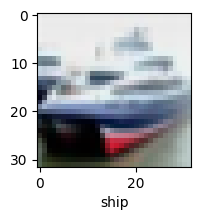

In [16]:
plot_sample(X_test,y_test,1)

In [17]:
y_pred = cnn.predict(X_test)
y_pred[0:5]
y_pred_cls  = [np.argmax(element) for element in y_pred]
y_pred_cls[0:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(3)]

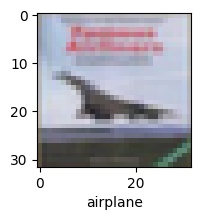

In [18]:
plot_sample(X_test,y_test,3)

In [19]:
classes[y_pred_cls[3]]

'airplane'

In [22]:
print("classification_report: \n",classification_report(y_test,y_pred_cls))

classification_report: 
               precision    recall  f1-score   support

           0       0.48      0.71      0.57      1000
           1       0.54      0.81      0.64      1000
           2       0.65      0.23      0.34      1000
           3       0.40      0.25      0.30      1000
           4       0.75      0.11      0.20      1000
           5       0.35      0.69      0.47      1000
           6       0.81      0.33      0.47      1000
           7       0.54      0.59      0.56      1000
           8       0.63      0.73      0.67      1000
           9       0.56      0.70      0.62      1000

    accuracy                           0.51     10000
   macro avg       0.57      0.51      0.49     10000
weighted avg       0.57      0.51      0.49     10000

